<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Clustering_people.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/drive/MyDrive/Colab Notebooks/Kaggle"

In [6]:
!kaggle datasets download -d rainbowgirl/clustering-categorical-peoples-interests

  0% 0.00/192k [00:00<?, ?B/s]
100% 192k/192k [00:00<00:00, 41.2MB/s]


In [7]:
!unzip '/content/clustering-categorical-peoples-interests.zip' && rm '/content/clustering-categorical-peoples-interests.zip'

Archive:  /content/clustering-categorical-peoples-interests.zip
  inflating: kaggle_Interests_group.csv  


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
plt.style.use('fivethirtyeight')

In [9]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/kaggle_Interests_group.csv')
data.head()

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6340 entries, 0 to 6339
Columns: 219 entries, group to interest217
dtypes: float64(217), int64(1), object(1)
memory usage: 10.6+ MB


In [17]:
data = data.fillna(0)

In [18]:
data.isnull().sum()

group                  0
grand_tot_interests    0
interest1              0
interest2              0
interest3              0
                      ..
interest213            0
interest214            0
interest215            0
interest216            0
interest217            0
Length: 219, dtype: int64

In [19]:
data = data.drop(["group", "grand_tot_interests"], axis=1)
data.head(1)

,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,interest10,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
np.round(data.describe(),2)

,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,interest10,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
count,6340.00,6340.00,6340.00,6340.00,6340.00,6340.00,6340.00,6340.00,6340.00,6340.00,...,6340.00,6340.00,6340.00,6340.00,6340.00,6340.00,6340.00,6340.00,6340.00,6340.00
mean,0.16,0.00,0.01,0.00,0.13,0.54,0.00,0.01,0.05,0.00,...,0.02,0.02,0.79,0.39,0.14,0.00,0.01,0.78,0.64,0.02
std,0.36,0.01,0.07,0.06,0.33,0.50,0.01,0.12,0.22,0.01,...,0.14,0.13,0.40,0.49,0.35,0.02,0.11,0.41,0.48,0.15
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00
max,1.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,2.00,1.00,...,2.00,1.00,2.00,2.00,2.00,1.00,1.00,2.00,2.00,1.00


In [21]:
data_norm = (data-data.min())/(data.max()-data.min())


In [22]:
np.round(data_norm.describe(),2)

,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,interest10,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
count,6340.00,6340.00,6340.00,6340.00,6340.00,6340.00,6340.00,6340.00,6340.00,6340.00,...,6340.00,6340.00,6340.0,6340.00,6340.00,6340.00,6340.00,6340.00,6340.00,6340.00
mean,0.16,0.00,0.01,0.00,0.06,0.27,0.00,0.01,0.03,0.00,...,0.01,0.02,0.4,0.20,0.07,0.00,0.01,0.39,0.32,0.02
std,0.36,0.01,0.07,0.06,0.17,0.25,0.01,0.12,0.11,0.01,...,0.07,0.13,0.2,0.24,0.17,0.02,0.11,0.21,0.24,0.15
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.5,0.00,0.00,0.00,0.00,0.50,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,...,0.00,0.00,0.5,0.00,0.00,0.00,0.00,0.50,0.50,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,...,0.00,0.00,0.5,0.50,0.00,0.00,0.00,0.50,0.50,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# **Looking for the right quantity of cluster**

In [23]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, max_iter=300)
  kmeans.fit(data_norm)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'wcss')

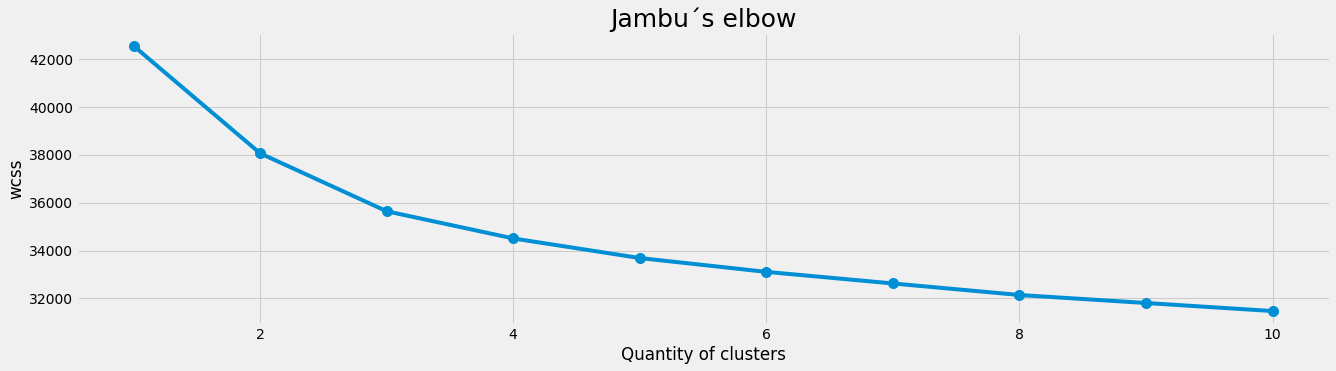

In [27]:
plt.figure(figsize=(20,5))
plt.plot(range(1,11), wcss, marker='o', ms=10)
plt.title("Jambu´s elbow", fontsize=25)
plt.xlabel("Quantity of clusters")
plt.ylabel("wcss")

In [28]:
clustering = KMeans(n_clusters=4, max_iter=300)
clustering.fit(data_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [30]:
data["Kmeans_Clusters"] = clustering.labels_
data.head()

,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,interest10,...,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217,Kmeans_Clusters
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2


In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcaHobbies = pca.fit_transform(data_norm)
DFpcaHobbies = pd.DataFrame(data=pcaHobbies, columns=['Component1','Component2'])
pcaHobbiesName = pd.concat([DFpcaHobbies,data[["Kmeans_Clusters"]]],axis=1)

pcaHobbiesName

,Component1,Component2,Kmeans_Clusters
0,-1.307526,-0.020428,1
1,0.847492,1.001010,3
2,-0.736083,-0.331132,2
3,-0.324697,0.076033,2
4,-0.227190,-0.287393,2
...,...,...,...
6335,1.060092,-0.885307,0
6336,0.830085,-0.662950,0
6337,0.708127,-0.089789,0
6338,0.065651,0.511377,3


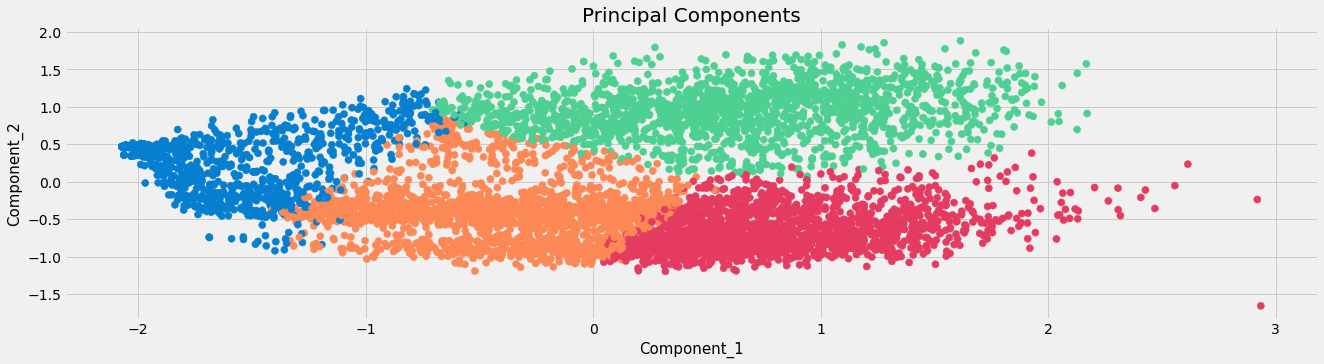

In [36]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Component_1", fontsize=15)
ax.set_ylabel("Component_2", fontsize=15)
ax.set_title("Principal Components", fontsize=20)

color = np.array(['#E63B60','#067FD0','#FC8955','#4DD091'])
ax.scatter(x=pcaHobbiesName.Component1, y=pcaHobbiesName.Component2, c=color[pcaHobbiesName.Kmeans_Clusters], s = 50 )

In [37]:
import plotly.express as px

px.scatter(pcaHobbiesName, x='Component1',y='Component2', color='Kmeans_Clusters')